In [19]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def read_river(river_name):
    river_flow = pd.read_csv(f'{river_name}_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
    river_flow['date'] = pd.to_datetime(river_flow.drop(columns='flow'))
    river_flow.set_index('date', inplace=True)
    river_flow = river_flow.drop(columns=['year', 'month', 'day'])
    return river_flow

In [4]:
nico = read_river('Nicomekl_203')

<AxesSubplot:xlabel='date'>

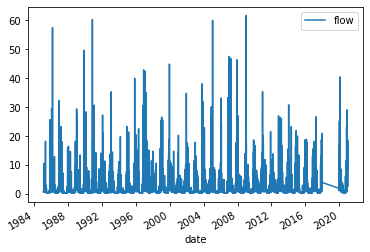

In [5]:
nico.plot()

In [6]:
climate = nico.groupby([nico.index.month, nico.index.day]).mean()

(0.0, 20.0)

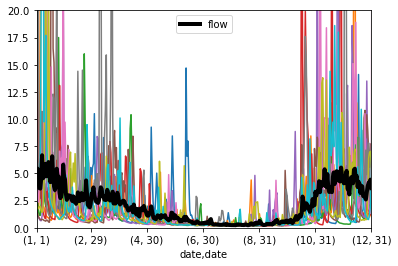

In [21]:
fig, ax = plt.subplots(1, 1)

for year in np.arange(2000, 2010):
    ax.plot(nico.index - dt.datetime(year, 1, 1) + dt.datetime(1970, 1, 1), nico.flow)
ax.set_xlim(dt.datetime(1970, 1, 1), dt.datetime(1971, 1, 1))
climate.plot(ax=ax, linewidth=4, color='k')
ax.set_ylim(0, 20)

In [23]:
print (climate.sum()/366.)

flow    2.039331
dtype: float64
